In [1]:
import networkx as nx
import time
import resource 

In [2]:
import math

def dot(v,w):
    x,y = v
    X,Y = w
    return x*X + y*Y

def length(v):
    x,y = v
    return math.sqrt(x*x + y*y)

def vector(b,e):
    x,y = b
    X,Y = e
    return (X-x, Y-y)

def unit(v):
    x,y = v
    mag = length(v)
    return (x/mag, y/mag)

def distance(p0,p1):
    return length(vector(p0,p1))

def scale(v,sc):
    x,y = v
    return (x * sc, y * sc)

def add(v,w):
    x,y = v
    X,Y = w
    return (x+X, y+Y)


def pnt2line(pnt, start, end):   #node position as input
    line_vec = vector(start, end)
    pnt_vec = vector(start, pnt)
    line_len = length(line_vec)
    line_unitvec = unit(line_vec)
    pnt_vec_scaled = scale(pnt_vec, 1.0/line_len)
    t = dot(line_unitvec, pnt_vec_scaled)    
    if t < 0.0:
        t = 0.0
    elif t > 1.0:
        t = 1.0
    nearest = scale(line_vec, t)
    dist = distance(nearest, pnt_vec)
    nearest = add(nearest, start)
    return dist


def dist_euclidean(p1, p2, pos):  #node name as input and pos to specify name of position variable for this graph
    x1, y1 = pos[p1]
    x2, y2 = pos[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

# New backtracking version that doesn't include it in the visited_nodes

In [3]:
#Note these are called backtracking but are the same as with the weighted graphs.

def Human_gaze_algorithm_backtracking(Graph, start_node, end_node, pos):
    current_node = start_node
    visited_nodes = [start_node]
    dead_nodes = []
    while current_node != end_node:
        neighbors = list(Graph.neighbors(current_node))
        for i in visited_nodes:
            if i in neighbors:
                neighbors.remove(i)
        for i in dead_nodes:
            if i in neighbors:
                neighbors.remove(i)
        
        
        if len(neighbors) == 0:
            visited_nodes.remove(current_node)
            dead_nodes.append(current_node)
            
            while len(neighbors) == 0:                                                  
                current_node = visited_nodes[-1]
                neighbors = list(Graph.neighbors(current_node))
                # is this still necessary if we have dead_nodes conditional
                for i in visited_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                for i in dead_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                visited_nodes.remove(current_node) 
                
            visited_nodes.append(current_node) 
            
        options = {} 
        
        for i in neighbors:
                options[i] = pnt2line(pos[i], pos[start_node], pos[end_node])
        current_node = min(options, key=options.get)
        visited_nodes.append(current_node)  
               
    return visited_nodes


def Human_gaze_algorithm_2_backtracking(Graph, start_node, end_node, pos):
    current_node = start_node
    visited_nodes = [start_node]
    dead_nodes = [] # a node might be added multiple times to this know maybe as it was before might not be a problem
    while current_node != end_node:
        neighbors = list(Graph.neighbors(current_node))
        for i in visited_nodes:
            if i in neighbors:
                neighbors.remove(i)
        for i in dead_nodes:
            if i in neighbors:
                neighbors.remove(i)
        
        
        if len(neighbors) == 0:
            visited_nodes.remove(current_node)
            dead_nodes.append(current_node)
            
            while len(neighbors) == 0:                                                  
                current_node = visited_nodes[-1]
                neighbors = list(Graph.neighbors(current_node))
                # is this still necessary if we have dead_nodes conditional
                for i in visited_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                for i in dead_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                visited_nodes.remove(current_node) # instead of adding it again to visited nodes we want to take it away 
                
            visited_nodes.append(current_node) 
            
        options = {} 
        
        for i in neighbors:
                options[i] = pnt2line(pos[i], pos[current_node], pos[end_node])
        current_node = min(options, key=options.get)
        visited_nodes.append(current_node)  
               
    return visited_nodes


def Human_gaze_algorithm_3_backtracking(Graph, start_node, end_node, pos):
    current_node = start_node
    visited_nodes = [start_node]
    dead_nodes = [] # a node might be added multiple times to this know maybe as it was before might not be a problem
    while current_node != end_node:
        neighbors = list(Graph.neighbors(current_node))
        for i in visited_nodes:
            if i in neighbors:
                neighbors.remove(i)
        for i in dead_nodes:
            if i in neighbors:
                neighbors.remove(i)
        
        
        if len(neighbors) == 0:
            visited_nodes.remove(current_node)
            dead_nodes.append(current_node)
            
            while len(neighbors) == 0:                                                  
                current_node = visited_nodes[-1]
                neighbors = list(Graph.neighbors(current_node))
                # is this still necessary if we have dead_nodes conditional
                for i in visited_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                for i in dead_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                visited_nodes.remove(current_node) # instead of adding it again to visited nodes we want to take it away 
                
            visited_nodes.append(current_node) 
            
        options = {} 
        
        for i in neighbors:
                options[i] = pnt2line(pos[i], pos[current_node], pos[end_node])
                options[i] += dist_euclidean(i, end_node, pos)
        current_node = min(options, key=options.get)
        visited_nodes.append(current_node)  
               
    return visited_nodes

# Notes on version:
### Version greedy: 
Might benefit from using start/end geodesic and or adding eucliedan heuristic

### Version 3:
Might benefit from using start/end geodesic

# The Graphs

## USA/EUROPE/ASIA

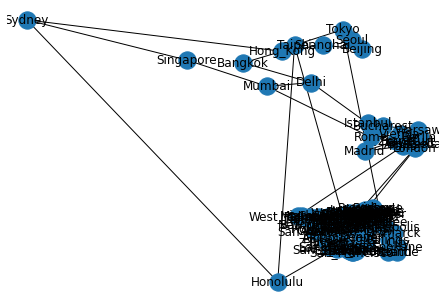

In [4]:
G1 = nx.Graph()

G1.add_nodes_from(["Abilene","Albany","Albuquerque","Atlanta","Austin","Baltimore","Baton_Rouge","Billings","Birmingham",
                  "Bismarck","Boston","Buffalo","Charleston","Charlotte","Chicago","Cincinnati","Cleveland","Columbus",
                  "Dallas","Denver","Detroit","El_Paso","Fresno","Greensboro","Hartford","Houston","Jacksonville",
                  "Kansas_City","Las_Vegas","Little_Rock","Long_Island","Los_Angeles","Louisville","Memphis","Miami",
                  "Milwaukee","Minneapolis","Nashville","New_Orleans","New_York","Newark","Norfolk","Oakland",
                  "Oklahoma_City","Omaha","Orlando","Philadelphia","Phoenix","Pittsburgh","Portland","Providence",
                  "Raleigh","Richmond","Rochester","Sacramento","Salt_Lake_City","San_Antonio","San_Diego",
                  "San_Francisco","San_Jose","Santa_Barbara","Scranton","Seattle","Spokane","Springfield","St_Louis",
                  "Syracuse","Tallahassee","Tampa","Toledo","Tucson","Tulsa","Washington_DC","West_Palm_Beach",
                  "Wilmington","Amsterdam","Berlin","Brussels","Bucharest","Frankfurt","Istanbul","London","Madrid",
                  "Paris","Rome","Vienna","Warsaw","Zurich","Bangkok","Beijing","Delhi","Hong_Kong","Honolulu","Mumbai",
                  "Seoul","Shanghai","Singapore","Sydney","Taipei","Tokyo"])

pos_G1 = {"Abilene" :(32.45, -99.739998), 
"Albany" :(42.6699982, -73.8000029),
"Albuquerque" :(35.119977, -106.61997),
"Atlanta" :(33.7599982, -84.4199987),
"Austin" :(30.3099988, -97.7500018),
"Baltimore" :(39.2999992, -76.6100008),
"Baton_Rouge" :(30.4499996, -91.1299968),
"Billings" :(45.79000104, -108.5400006),
"Birmingham" :(33.5299985, -86.8000029),
"Bismarck" :(46.81000154, -100.7699965),
"Boston" :(42.3400005, -71.0199959),
"Buffalo" :(42.8899993, -78.860001),
"Charleston" :(32.7900008, -79.9899982),
"Charlotte" :(35.2, -80.83),
"Chicago" :(41.839997, -87.680001),
"Cincinnati" :(39.1399991, -84.5100027),
"Cleveland" :(41.4799992, -81.6800014),
"Columbus" :(39.990002, -82.989997),
"Dallas" :(32.79, -96.77),
"Denver" :(39.77000271, -104.8700036),
"Detroit" :(42.3800019, -83.0999998),
"El_Paso" :(31.84981, -106.4396),
"Fresno" :(36.7800007, -119.790002),
"Greensboro" :(36.0800024, -79.8300018),
"Hartford" :(41.7700004, -72.6800003),
"Houston" :(29.77, -95.39),
"Jacksonville" :(30.330003, -81.660002),
"Kansas_City" :(39.1199992, -94.7300038),
"Las_Vegas" :(36.20999, -115.2199),
"Little_Rock" :(34.72, -92.35),
"Long_Island" :(40.5899999, -73.6699993),
"Los_Angeles" :(34.110001, -118.410002),
"Louisville" :(38.2200009, -85.7399979),
"Memphis" :(35.110001, -90.010004),
"Miami" :(25.7800006, -80.2099997),
"Milwaukee" :(43.0600013, -87.9700005),
"Minneapolis" :(44.9599988, -93.2699973),
"Nashville" :(36.1699984, -86.7799989),
"New_Orleans" :(30.07, -89.93),
"New_York" :(40.6699983, -73.9400035),
"Newark" :(40.7200012, -74.1699986),
"Norfolk" :(36.9199982, -76.2399978),
"Oakland" :(37.77000071, -122.2200016),
"Oklahoma_City" :(35.4700015, -97.5100028),
"Omaha" :(41.2599984, -96.0100022),
"Orlando" :(28.4999994, -81.370003),
"Philadelphia" :(40.0099985, -75.1299964),
"Phoenix" :(33.54000058, -112.0699996),
"Pittsburgh" :(40.3, -80.13),
"Portland" :(45.54000072, -122.6600035),
"Providence" :(41.82, -71.42),
"Raleigh" :(35.8199995, -78.6600034),
"Richmond" :(37.5299986, -77.4700015),
"Rochester" :(43.1699985, -77.620003),
"Sacramento" :(38.56999946, -121.4700016),
"Salt_Lake_City" :(40.77999863, -111.9300007),
"San_Antonio" :(29.459997, -98.510002),
"San_Diego" :(32.8100017, -117.139999),
"San_Francisco" :(37.65999942, -122.4199987),
"San_Jose" :(37.29999947, -121.8499985),
"Santa_Barbara" :(34.43000021, -119.7200014),
"Scranton" :(41.4, -75.67),
"Seattle" :(47.61999916, -122.3499985),
"Spokane" :(47.66999805, -117.4100038),
"Springfield" :(39.5, -89.4),
"St_Louis" :(38.64, -90.24),
"Syracuse" :(43.040001, -76.1399993),
"Tallahassee" :(30.46, -84.28),
"Tampa" :(27.9599988, -82.4800035),
"Toledo" :(41.659997, -83.58),
"Tucson" :(32.2, -110.89),
"Tulsa" :(36.13, -95.92),
"Washington_DC" :(38.9100003, -77.0199965),
"West_Palm_Beach" :(26.7499997, -80.1299975),
"Wilmington" :(39.7400018, -75.5299989),
"Amsterdam" :(52.3699996, 4.88999915),
"Berlin" :(52.520002, 13.379995),
"Brussels" :(50.830002, 4.330002),
"Bucharest" :(44.44, 26.1),
"Frankfurt" :(50.1199992, 8.68000104),
"Istanbul" :(41.1, 29),
"London" :(51.5200005, -0.100000296),
"Madrid" :(40.419998, -3.7100002),
"Paris" :(48.86, 2.3399995),
"Rome" :(41.8899996, 12.5000004),
"Vienna" :(48.2200024, 16.3700005),
"Warsaw" :(52.2599987, 21.0200005),
"Zurich" :(47.3800015, 8.5399996),
"Bangkok" :(13.73, 100.5),
"Beijing" :(39.92999979, 116.4000013),
"Delhi" :(28.6700003, 77.2099989),
"Hong_Kong" :(22.267, 114.14),
"Honolulu" :(21.3199996, -157.800003),
"Mumbai" :(18.9599987, 72.8199999),
"Seoul" :(37.56000108, 126.9899988),
"Shanghai" :(31.23, 121.47),
"Singapore" :(1.299999907, 103.8499992),
"Sydney" :(-33.86999896, 151.2100066),
"Taipei" :(25.0200005, 121.449997),
"Tokyo" :(35.6699986, 139.770004)}

G1.add_edges_from([   
("Abilene", "Dallas", {"weight": 336.9509334}),
("Abilene","El_Paso",{"weight":761.2090776}),
("Albany","Boston",{"weight":277.0649613}),
("Albany","Syracuse",{"weight":234.2212201}),
("Albuquerque","Dallas",{"weight":1133.443119}),
("Albuquerque","Denver",{"weight":647.7371779}),
("Albuquerque","El_Paso",{"weight":436.9494668}),
("Albuquerque","Las_Vegas",{"weight":943.5364333}),
("Amsterdam","Berlin",{"weight":690.6082921}),
("Amsterdam","Brussels",{"weight":210.7287967}),
("Amsterdam","Frankfurt",{"weight":436.3242408}),
("Amsterdam","New_York",{"weight":7035.611036}),
("Atlanta","Birmingham",{"weight":266.2280948}),
("Atlanta", "Charlotte", {"weight": 439.2379644}),    
("Atlanta","Jacksonville",{"weight":554.1108875}),
("Austin","Houston",{"weight":282.0488176}),
("Austin","San_Antonio",{"weight":143.5525064}),
("Baltimore","Philadelphia",{"weight":179.1949651}),
("Baltimore","Pittsburgh",{"weight":384.8187539}),
("Baltimore","Washington_DC",{"weight":67.17947405}),
("Bangkok","Delhi",{"weight":3505.949664}),
("Bangkok","Hong_Kong",{"weight":2070.724162}),
("Baton_Rouge","Houston",{"weight":500.1517957}),
("Baton_Rouge","New_Orleans",{"weight":147.3504058}),
("Beijing","Seoul",{"weight":1146.124217}),
("Beijing","Shanghai",{"weight":1284.465391}),
("Berlin","Warsaw",{"weight":623.0146936}),
("Billings","Bismarck",{"weight":729.0170987}),
("Billings","Denver", {"weight":880.041712}),
("Billings","Spokane" ,{"weight":848.8579799}),
("Birmingham","Nashville",{"weight":352.382908}),
("Birmingham","New_Orleans",{"weight":582.4644304}),
("Bismarck","Minneapolis",{"weight":738.9401642}),
("Boston","Providence",{"weight":79.92293577}),
("Brussels","London",{"weight":381.9130127}),
("Bucharest","Istanbul",{"weight":528.5804935}),
("Bucharest","Warsaw",{"weight":1136.200456}),
("Buffalo","Cleveland",{"weight":336.4337393}),
("Buffalo","Rochester",{"weight":126.6263824}),
("Charleston","Jacksonville",{"weight":379.311106}),
("Charleston","Raleigh",{"weight":430.1818131}),
("Charlotte","Greensboro",{"weight":159.8834469}),
("Chicago", "Detroit",{"weight":459.1452686}),
("Chicago", "Milwaukee",{"weight":165.3264805}),
("Chicago", "Springfield",{"weight":357.5730073}),
("Cincinnati", "Columbus",{"weight":193.2153767}),
("Cincinnati", "Louisville",{"weight":177.4925816}),
("Cincinnati", "Washington_DC",{"weight":777.0507392}),
("Cleveland","Columbus",{"weight":238.9630572}),
("Cleveland","Toledo",{"weight":191.2436294}),
("Columbus","Pittsburgh",{"weight":294.7135669}),
("Dallas","Houston",{"weight":432.7312491}),
("Dallas","Little_Rock",{"weight":553.9582807}),
("Dallas","Oklahoma_City",{"weight":366.9361351}),
("Delhi","Istanbul",{"weight":5457.525355}),
("Delhi","Mumbai",{"weight":1402.141042}),
("Denver","Omaha",{"weight":920.3373588}),
("Denver","Salt_Lake_City",{"weight":731.2717231}),
("Detroit","Toledo",{"weight":107.2436957}),
("El_Paso","San_Antonio",{"weight":964.4531908}),
("El_Paso","Tucson",{"weight":505.7485307}),
("Frankfurt","Vienna",{"weight":717.0013849}),
("Fresno","Las_Vegas",{"weight":496.1990407}),
("Fresno","Los_Angeles",{"weight":386.6707817}),
("Fresno","Oakland",{"weight":289.9410618}),
("Greensboro","Louisville",{"weight":690.4091794}),
("Greensboro","Raleigh",{"weight":131.0972102}),
("Greensboro","Richmond",{"weight":317.8965469}),
("Hartford","Long_Island",{"weight":186.2707622}),
("Hartford","Providence",{"weight":125.5599482}),
("Hong_Kong","Shanghai",{"weight":1480.405515}),
("Hong_Kong","Sydney",{"weight":8856.6}),
("Hong_Kong","Taipei",{"weight":966.1766739}),
("Honolulu","Los_Angeles",{"weight":4921.458828}),
("Honolulu","Sydney",{"weight":9808.615854}),
("Honolulu","Taipei",{"weight":9767.012902}),
("Istanbul","Rome",{"weight":1650.405834}),
("Jacksonville","Orlando",{"weight":246.5770348}),
("Kansas_City","Omaha",{"weight":314.0322058}),
("Kansas_City","St_Louis",{"weight":470.8657976}),
("Kansas_City","Tulsa",{"weight":418.4383844}),
("Las_Vegas","Phoenix",{"weight":495.9003239}),
("Las_Vegas","Salt_Lake_City",{"weight":700.0051286}),
("Little_Rock","Memphis",{"weight":261.3433471}),
("London","Paris",{"weight":411.6923734}),
("London","Washington_DC",{"weight":7079.44686}),
("Long_Island","New_York",{"weight":29.36152283}),
("Los_Angeles","San_Diego",{"weight":223.8445086}),
("Los_Angeles","Santa_Barbara",{"weight":150.6766134}),
("Louisville","Nashville",{"weight":295.1182142}),
("Louisville","St_Louis",{"weight":473.8016755}),
("Madrid","Paris",{"weight":1263.619232}),
("Madrid","Zurich",{"weight":1497.358313}),
("Memphis","Nashville",{"weight":377.8363294}),
("Miami","Paris",{"weight":8829.357704}),
("Miami","Tampa",{"weight":397.1149107}),
("Miami","West_Palm_Beach",{"weight":129.8250315}),
("Milwaukee","Minneapolis",{"weight":568.3338475}),
("Minneapolis","Omaha",{"weight":561.3270039}),
("Mumbai","Rome",{"weight":7415.84084}),
("Mumbai","Singapore",{"weight":4692.708049}),
("New_Orleans","Tallahassee",{"weight":653.3593336}),
("New_York","Newark",{"weight":24.21353477}),
("New_York","Scranton",{"weight":199.5750874}),
("New_York","Wilmington",{"weight":204.1516726}),
("Newark","Philadelphia",{"weight":136.0604521}),
("Norfolk","Raleigh",{"weight":298.6558234}),
("Norfolk","Wilmington",{"weight":383.6690534}),
("Oakland","Sacramento",{"weight":132.6490217}),
("Oakland","Salt_Lake_City",{"weight":1135.717402}),
("Oakland","San_Francisco",{"weight":25.71991716}),
("Oakland","Taipei",{"weight":12461.707}),
("Oklahoma_City","Tulsa",{"weight":193.3587768}),
("Orlando","West_Palm_Beach",{"weight":275.7928548}),
("Philadelphia","Scranton",{"weight":193.4089904}),
("Phoenix","San_Diego",{"weight":574.6750816}),
("Phoenix","Tucson",{"weight":222.4582756}),
("Pittsburgh","Scranton",{"weight":473.5653806}),
("Portland","Sacramento",{"weight":937.7404056}),
("Portland","Salt_Lake_City",{"weight":1221.189289}),
("Portland","Seattle",{"weight":279.0817311}),
("Portland","Tokyo",{"weight":9349.706225}),
("Richmond","Washington_DC",{"weight":190.1446685}),
("Rochester","Syracuse",{"weight":145.265921}),
("Rome","Vienna",{"weight":920.0256056}),
("Rome","Zurich",{"weight":823.3996782}),
("San_Francisco","San_Jose",{"weight":77.16267231}),
("San_Jose","Santa_Barbara",{"weight":446.9898708}),
("Scranton","Syracuse",{"weight":223.7750822}),
("Seattle","Spokane",{"weight":444.2069519}),
("Seoul","Tokyo",{"weight":1391.084532}),
("Singapore","Sydney",{"weight":7562.330522}),
("Springfield","St_Louis",{"weight":144.0599684}),
("Taipei","Tokyo",{"weight":2537.344602}),
("Tallahassee","Tampa",{"weight":394.0942686}),
("Vienna","Warsaw",{"weight":669.2971801})
])

nx.draw(G1, pos=pos_G1, with_labels=True)

## Germany

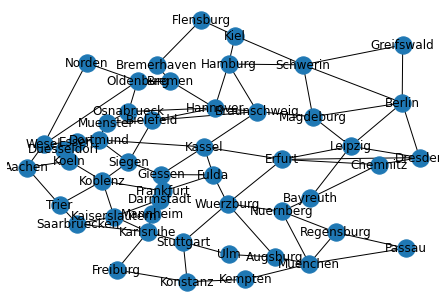

In [5]:
G3 = nx.Graph()

G3.add_nodes_from(["Aachen" ,"Augsburg" ,"Bayreuth","Berlin" ,"Bielefeld" ,"Braunschweig","Bremen","Bremerhaven",
                  "Chemnitz","Darmstadt","Dortmund" ,"Dresden" ,"Duesseldorf","Erfurt" ,"Essen","Flensburg",
                  "Frankfurt" ,"Freiburg","Fulda","Giessen","Greifswald","Hamburg","Hannover","Kaiserslautern",
                  "Karlsruhe","Kassel","Kempten","Kiel","Koblenz","Koeln","Konstanz","Leipzig","Magdeburg",
                  "Mannheim","Muenchen","Muenster","Norden","Nuernberg","Oldenburg","Osnabrueck","Passau",
                  "Regensburg", "Saarbruecken", "Schwerin", "Siegen", "Stuttgart", "Trier", "Ulm", "Wesel",
                  "Wuerzburg"])

pos_G3 = {"Aachen" :( 6.04, 50.76 ),
  "Augsburg" :( 10.90, 48.33 ),
  "Bayreuth": ( 11.59, 49.93 ),
  "Berlin" :( 13.39 ,52.52 ),
  "Bielefeld" :( 8.50, 52.04 ),
  "Braunschweig": ( 10.55, 52.28 ),
  "Bremen" :( 8.85 ,53.11 ),
  "Bremerhaven" :( 8.58 ,53.54 ),
  "Chemnitz": ( 12.93 ,50.84 ),
  "Darmstadt": ( 8.65, 49.89 ),
  "Dortmund" :( 7.45, 51.51 ),
  "Dresden" :( 13.73, 51.03 ),
  "Duesseldorf": ( 6.77 ,51.25 ),
  "Erfurt" :( 11.04 ,50.98 ),
  "Essen": ( 7.02, 51.46 ),
  "Flensburg" :( 9.45, 54.77 ),
  "Frankfurt" :( 8.71, 50.12 ),
  "Freiburg": ( 7.80 ,47.98 ),
  "Fulda" :( 9.69 ,50.56 ),
  "Giessen" :( 8.67, 50.57 ),
  "Greifswald" :( 13.40 ,54.09 ),
  "Hamburg" :( 9.99, 53.57 ),
  "Hannover": ( 9.72 ,52.38 ),
  "Kaiserslautern" :( 7.75, 49.43 ),
  "Karlsruhe" :( 8.41 ,49.01 ),
  "Kassel" :( 9.51, 51.32 ),
  "Kempten": ( 10.32, 47.72 ),
  "Kiel" :( 10.12, 54.34 ),
  "Koblenz" :( 7.52, 50.40 ),
  "Koeln" :( 6.87 ,50.94 ),
  "Konstanz" :( 9.18, 47.66 ),
  "Leipzig" :( 12.38 ,51.34 ),
  "Magdeburg" :( 11.64 ,52.14 ),
  "Mannheim" :( 8.49 ,49.49 ),
  "Muenchen" :( 11.57 ,48.15 ),
  "Muenster": ( 7.60, 51.97 ),
  "Norden" :( 7.21, 53.60 ),
  "Nuernberg": ( 11.03 ,49.57 ),
  "Oldenburg" :( 8.21, 53.11 ),
  "Osnabrueck": ( 8.03, 52.28 ),
  "Passau" :( 13.46, 48.57 ),
  "Regensburg" :( 12.09, 49.00 ),
  "Saarbruecken" :( 7.03 ,49.23 ),
  "Schwerin" :( 11.45, 53.55 ),
  "Siegen" :( 8.03 ,50.91 ),
  "Stuttgart" :( 9.10, 48.74 ),
  "Trier" :( 6.68, 49.75 ),
  "Ulm" :( 9.99 ,48.40 ),
  "Wesel" :( 6.37, 51.39 ),
  "Wuerzburg" :( 9.97, 49.78 )
      }

G3.add_edges_from([
  ( "Duesseldorf", "Essen", {"weight":30.74} ),
  ( "Dortmund", "Essen" ,{"weight":31.69}) ,
  ( "Wesel", "Essen" ,{"weight":35.53}) ,
  ( "Koeln", "Duesseldorf",{"weight":34.15}  ),
  ( "Aachen" ,"Koeln" ,{"weight":64.33}) ,
  ( "Koblenz" ,"Koeln" ,{"weight":79.05}) ,
  ( "Muenster", "Dortmund" ,{"weight":51.71}), 
  ( "Siegen", "Dortmund" ,{"weight":80.89}) ,
  ( "Kassel", "Dortmund" ,{"weight":142.47}) ,
  ( "Wesel", "Aachen" ,{"weight":104.69}) ,
  ( "Trier", "Aachen" ,{"weight":120.53}) ,
  ( "Bielefeld", "Muenster" ,{"weight":62.28}), 
  ( "Osnabrueck", "Muenster" ,{"weight":44.42}), 
  ( "Siegen", "Koblenz" ,{"weight":64.83}) ,
  ( "Frankfurt" ,"Koblenz" ,{"weight":81.53}), 
  ( "Kaiserslautern", "Koblenz" ,{"weight":102.12}), 
  ( "Trier" ,"Koblenz" ,{"weight":95.49}) ,
  ( "Bielefeld", "Siegen" ,{"weight":132.59}), 
  ( "Giessen", "Siegen" ,{"weight":56.23}) ,
  ( "Oldenburg", "Wesel" ,{"weight":197.36}), 
  ( "Norden" ,"Wesel" ,{"weight":219.22}) ,
  ( "Leipzig" ,"Berlin" , {"weight":149.7}),
  ( "Dresden" ,"Berlin" ,{"weight":165.22}) ,
  ( "Schwerin" ,"Berlin" ,{"weight":181.03}) ,
  ( "Magdeburg" ,"Berlin" ,{"weight":128.00}) ,
  ( "Greifswald", "Berlin" ,{"weight":175.00}) ,
  ( "Dresden" ,"Leipzig" ,{"weight":100.21}) ,
  ( "Erfurt", "Leipzig" ,{"weight":102.50}) ,
  ( "Magdeburg", "Leipzig" ,{"weight":101.44}), 
  ( "Bayreuth", "Leipzig" ,{"weight":165.39}) ,
  ( "Erfurt", "Dresden" ,{"weight":189.86}) ,
  ( "Chemnitz" ,"Dresden" ,{"weight":61.69}) ,
  ( "Chemnitz" ,"Erfurt" ,{"weight":134.27}) ,
  ( "Kassel", "Erfurt"  ,{"weight":113.27}),
  ( "Wuerzburg" ,"Erfurt" ,{"weight":152.40}),
  ( "Bayreuth" ,"Chemnitz" ,{"weight":137.92}), 
  ( "Magdeburg", "Schwerin" ,{"weight":166.81}), 
  ( "Greifswald" ,"Schwerin" ,{"weight":139.47}), 
  ( "Hamburg", "Schwerin" ,{"weight":94.40}) ,
  ( "Kiel" ,"Schwerin" ,{"weight":114.12}) ,
  ( "Braunschweig", "Magdeburg" ,{"weight":77.33}), 
  ( "Kiel", "Hamburg" ,{"weight":86.01}) ,
  ( "Hannover", "Hamburg" ,{"weight":132.52}), 
  ( "Braunschweig" ,"Hamburg" ,{"weight":147.82}), 
  ( "Oldenburg" ,"Bremen" ,{"weight":40.01}),
  ( "Bremerhaven" ,"Bremen" ,{"weight":53.67}), 
  ( "Hannover", "Bremen" ,{"weight":100.10}) ,
  ( "Flensburg", "Kiel" ,{"weight":68.15}) ,
  ( "Norden" ,"Oldenburg" ,{"weight":84.38}), 
  ( "Osnabrueck", "Oldenburg" ,{"weight":97.30}), 
  ( "Bremerhaven" ,"Flensburg" ,{"weight":148.71}), 
  ( "Bielefeld", "Hannover" ,{"weight":90.68}) ,
  ( "Braunschweig" ,"Hannover" ,{"weight":55.07} ),
  ( "Osnabrueck" ,"Hannover" ,{"weight":114.95}) ,
  ( "Braunschweig" ,"Bielefeld" ,{"weight":138.63}), 
  ( "Kassel", "Braunschweig" ,{"weight":126.83}) ,
  ( "Giessen" ,"Kassel" ,{"weight":99.75}) ,
  ( "Fulda" ,"Kassel" ,{"weight":85.97}) ,
  ( "Darmstadt", "Frankfurt" ,{"weight":26.26}), 
  ( "Giessen", "Frankfurt" ,{"weight":52.59}) ,
  ( "Fulda", "Frankfurt" ,{"weight":86.10}) ,
  ( "Mannheim", "Darmstadt" ,{"weight":44.89}),
  ( "Kaiserslautern" ,"Darmstadt" ,{"weight":79.32}), 
  ( "Karlsruhe" ,"Mannheim" ,{"weight":53.26}) ,
  ( "Saarbruecken", "Kaiserslautern" ,{"weight":60.78}), 
  ( "Karlsruhe" ,"Kaiserslautern",{"weight":66.95} ),
  ( "Fulda", "Giessen" ,{"weight":70.45}),
  ( "Saarbruecken" ,"Trier" ,{"weight":62.90}), 
  ( "Wuerzburg" ,"Fulda" ,{"weight":86.37}) ,
  ( "Karlsruhe" ,"Saarbruecken" ,{"weight":105.61}), 
  ( "Karlsruhe", "Stuttgart" , {"weight":62.34}),
  ( "Ulm" ,"Stuttgart" ,{"weight":73.23}) ,
  ( "Konstanz" ,"Stuttgart" ,{"weight":124.00}), 
  ( "Wuerzburg", "Stuttgart" ,{"weight":125.40}), 
  ( "Freiburg", "Karlsruhe" ,{"weight":119.49}) ,
  ( "Augsburg", "Ulm" ,{"weight":66.31}) ,
  ( "Freiburg", "Konstanz" ,{"weight":105.26} ),
  ( "Kempten" ,"Konstanz" ,{"weight":85.50}) ,
  ( "Augsburg", "Muenchen" ,{"weight":56.79}) ,
  ( "Kempten", "Muenchen" ,{"weight":105.22}) ,
  ( "Passau" ,"Muenchen" ,{"weight":147.33}) ,
  ( "Nuernberg", "Muenchen" ,{"weight":150.34}), 
  ( "Regensburg" ,"Muenchen" ,{"weight":104.82}),
  ( "Wuerzburg" ,"Augsburg" ,{"weight":173.69}) ,
  ( "Regensburg", "Passau" ,{"weight":111.27}) ,
  ( "Bayreuth" ,"Nuernberg" ,{"weight":65.01}) ,
  ( "Wuerzburg" ,"Nuernberg" ,{"weight":91.43}) ,
  ( "Regensburg", "Nuernberg", {"weight":88.48}  )
])

nx.draw(G3, pos=pos_G3, with_labels=True)

## USA 30 node

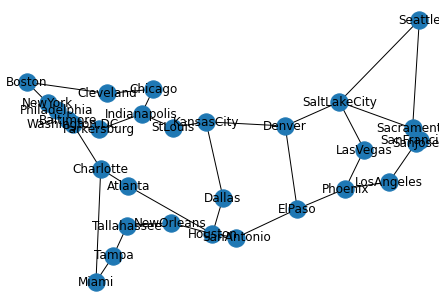

In [6]:
G4=nx.Graph()

G4.add_nodes_from(["Atlanta","Baltimore","Boston","Chicago","Charlotte","Cleveland","Dallas","Denver","ElPaso",
                  "Houston","Indianapolis","KansasCity","LosAngeles","LasVegas","Miami","Parkersburg","NewOrleans",
                  "NewYork","Philadelphia","Phoenix","Sacramento","SaltLakeCity","SanAntonio","SanFrancisco",
                  "SanJose","StLouis","Seattle","Tampa","Tallahassee","Washington,DC"])

pos_G4 = {'Atlanta':(84.42, 33.76),
 'Baltimore':(76.61, 39.3),
 'Boston':(71.2, 42.43),
 'Chicago':(87.68, 41.84),
 'Charlotte':(80.83, 35.2),
 'Cleveland':(81.68, 41.48),
 'Dallas':(96.77, 32.79),
 'Denver':(104.87, 38.77),
 'ElPaso':(106.44, 31.85),
 'Houston':(95.39, 29.77),
 'Indianapolis':(86.15, 39.78),
 'KansasCity':(94.55, 39.12),
 'LosAngeles':(118.41, 34.11),
 'LasVegas':(115.17, 36.8),
 'Miami':(80.21, 25.78),
 'Parkersburg':(80.65, 38.48),
 'NewOrleans':(89.93, 30.7),
 'NewYork':(73.94, 40.67),
 'Philadelphia':(75.13, 40.1),
 'Phoenix':(112.7, 33.54),
 'Sacramento':(121.47, 38.57),
 'SaltLakeCity':(111.93, 40.78),
 'SanAntonio':(98.51, 29.46),
 'SanFrancisco':(122.38, 37.62),
 'SanJose':(121.92, 37.37),
 'StLouis':(90.24, 38.64),
 'Seattle':(122.35, 47.62),
 'Tampa':(82.48, 27.96),
 'Tallahassee':(84.28, 30.46),
 'Washington,DC':(77.2, 38.91)}

G4.add_edges_from([("Charlotte","Miami", {"weight":1365.4}),
("Atlanta","Houston", {"weight":1467}),
("Atlanta","Charlotte", {"weight":457}),
("StLouis","Indianapolis", {"weight":487.3}),
("Seattle","Sacramento", {"weight":1374}),
("Washington,DC","Charlotte", {"weight":730}),
("Baltimore","Philadelphia", {"weight":166.2}),
("Baltimore","Washington,DC", {"weight":71.5}),
("Denver","SaltLakeCity", {"weight":850}),
("Sacramento","SanFrancisco", {"weight":180}),
("Cleveland","Boston", {"weight":1190}),
("SanJose","LosAngeles", {"weight":626.4}),
("Chicago","Cleveland", {"weight":720.6}),
("Chicago","Indianapolis", {"weight":357.1}),
("Denver","ElPaso", {"weight":1160.8}),
("Boston","NewYork", {"weight":398.1}),
("NewOrleans","Houston", {"weight":686.1}),
("Parkersburg","Washington,DC", {"weight":414.9}),
("KansasCity","Dallas", {"weight":1060}),
("Dallas","Houston", {"weight":464.6}),
("Indianapolis","Parkersburg", {"weight":680}),
("SaltLakeCity","LasVegas", {"weight":772.8}),
("SaltLakeCity","Sacramento", {"weight":1110}),
("KansasCity","Denver", {"weight":1156.5}),
("ElPaso","Phoenix", {"weight":720}),
("ElPaso","SanAntonio", {"weight":978.8}),
("Seattle","SaltLakeCity", {"weight":1463.4}),
("Houston","SanAntonio", {"weight":380}),
("LosAngeles","Phoenix", {"weight":766.5}),
("KansasCity","StLouis", {"weight":489.8}),
("LasVegas","Phoenix", {"weight":526.4}),
("Miami","Tampa", {"weight":430}),
("NewOrleans","Tallahassee", {"weight":702.6}),
("NewYork","Philadelphia", {"weight":164.5}),
("SanFrancisco","SanJose", {"weight":69}),
("Tampa","Tallahassee", {"weight":426})])

nx.draw(G4, pos=pos_G4, with_labels=True)

## USA 75 node 

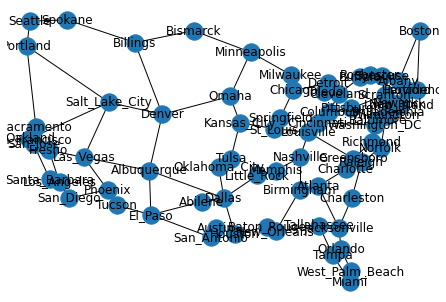

In [7]:
G2 = nx.Graph()

G2.add_nodes_from(["Abilene","Albany","Albuquerque","Atlanta","Austin","Baltimore","Baton_Rouge","Billings","Birmingham",
                  "Bismarck","Boston","Buffalo","Charleston","Charlotte","Chicago","Cincinnati","Cleveland","Columbus",
                  "Dallas","Denver","Detroit","El_Paso","Fresno","Greensboro","Hartford","Houston","Jacksonville",
                  "Kansas_City","Las_Vegas","Little_Rock","Long_Island","Los_Angeles","Louisville","Memphis",
                  "Miami","Milwaukee","Minneapolis","Nashville","New_Orleans","New_York","Newark","Norfolk","Oakland",
                  "Oklahoma_City","Omaha","Orlando","Philadelphia","Phoenix","Pittsburgh","Portland","Providence",
                  "Raleigh","Richmond","Rochester","Sacramento","Salt_Lake_City","San_Antonio","San_Diego","San_Francisco",
                  "San_Jose","Santa_Barbara","Scranton","Seattle","Spokane","Springfield","St_Louis","Syracuse",
                  "Tallahassee","Tampa","Toledo","Tucson","Tulsa","Washington_DC","West_Palm_Beach","Wilmington"])

pos_G2 = {"Abilene":(-99.7,32.5),
       "Albany":(-73.8,42.6),
       "Albuquerque":(-106.6,35.1),
       "Atlanta":(-84.4,33.8),
       "Austin":(-97.8,30.3),
       "Baltimore":(-76.6, 39.3),
       "Baton_Rouge":(-91.1,30.4),
       "Billings":(-108.5,45.8),
       "Birmingham":(-86.8,33.5),
       "Bismarck":(-100.8,46.8),
       "Boston":(-71.1,46.8),
       "Buffalo":(-78.9,42.9),
       "Charleston":(-80.0,32.8),
       "Charlotte":(-80.8,35.2),
       "Chicago":(-87.7,41.8),
       "Cincinnati":(-84.5,39.1),
       "Cleveland":(-81.7,41.5),
       "Columbus":(-83.0,40.0),
       "Dallas":(-96.8,32.8),
       "Denver":(-104.9, 39.8),
       "Detroit":(-83.1,42.4),
       "El_Paso":(-106.4,31.4),
       "Fresno":(-119.8,36.8),
       "Greensboro":(-79.8,36.1),
       "Hartford":(-72.7,41.8),
       "Houston":(-95.4,29.8),
       "Jacksonville":(-81.7,30.3),
       "Kansas_City":(-94.7,39.1),
       "Las_Vegas":(-115.2,36.2),
       "Little_Rock":(-92.4,34.7),
       "Long_Island":(-73.7,40.6),
       "Los_Angeles":(-118.4,34.1),
       "Louisville":(-85.7,38.3),
       "Memphis":(-90.0,35.1),
       "Miami":(-80.2,25.8),
       "Milwaukee":(-88.0,43.1),
       "Minneapolis":(-93.3,45.0),
       "Nashville":(-86.8,36.2),
       "New_Orleans":(-90.0,30.0),
       "New_York":(-74.0,40.7),
       "Newark":(-74.2,40.7),
       "Norfolk":(-76.2,37.0),
       "Oakland":(-122.2,37.8),
       "Oklahoma_City":(-97.5,35.4),
       "Omaha":(-96.0,41.3),
       "Orlando":(-81.4,28.5),
       "Philadelphia":(-75.1,40.0),
       "Phoenix":(-112.1,33.5),
       "Pittsburgh":(-80.1,40.3),
       "Portland":(-122.7,45.5),
       "Providence":(-71.4,41.8),
       "Raleigh":(-78.7,35.8),
       "Richmond":(-77.4,37.5),
       "Rochester":(-77.6,43.1),
       "Sacramento":(-121.5,38.7),
       "Salt_Lake_City":(-111.9,40.8),
       "San_Antonio":(-98.5,29.5),
       "San_Diego":(-117.1,32.8),
       "San_Francisco":(-122.4,37.7),
       "San_Jose":(-121.8,37.3),
       "Santa_Barbara":(-119.7,34.4),
       "Scranton":(-75.7,41.4),
       "Seattle":(-122.3,47.6),
       "Spokane":(-117.4,47.7),
       "Springfield":(-89.4,39.5),
       "St_Louis":(-90.2,38.6),
       "Syracuse":(-76.1,43.0),
       "Tallahassee":(-84.3,30.5),
       "Tampa":(-82.5,28.0),
       "Toledo":(-83.6,41.7),
       "Tucson":(-110.9,32.2),
       "Tulsa":(-95.9,36.1),
       "Washington_DC":(-77.0,38.9),
       "West_Palm_Beach":(-80.1,26.7),
       "Wilmington":(-75.5,39.7)}

G2.add_edges_from([
("Abilene", "Dallas",{"weight":336.9509334}),
("Abilene", "El_Paso",{"weight":761.2090776}),
("Albany", "Boston",{"weight":277.649613}),
("Albany", "Syracuse",{"weight":234.2212201}),
("Albuquerque", "Dallas",{"weight":1133.443119}),
("Albuquerque", "Denver",{"weight":647.7371779}),
("Albuquerque", "El_Paso",{"weight":436.9494668}),
("Albuquerque", "Las_Vegas",{"weight":943.5364333}),
("Atlanta", "Birmingham",{"weight":266.2280948}),
("Atlanta", "Charlotte",{"weight":439.279644}),
("Atlanta", "Jacksonville",{"weight":554.1108875}),
("Austin", "Houston",{"weight":282.0488176}),
("Austin", "San_Antonio",{"weight":143.5525064}),
("Baltimore", "Philadelphia",{"weight":179.1949651}),
("Baltimore", "Pittsburgh",{"weight":384.8187539}),
("Baltimore", "Washington_DC",{"weight":67.17947405}),
("Baton_Rouge", "Houston",{"weight":500.1517957}),
("Baton_Rouge", "New_Orleans",{"weight":147.3504058}),
("Billings", "Bismarck",{"weight":729.0170987}),
("Billings", "Denver",{"weight":880.041712}),
("Billings", "Spokane",{"weight":848.8579799}),
("Birmingham", "Nashville",{"weight":352.382908}),
("Birmingham", "New_Orleans",{"weight":582.4644304}),
("Bismarck", "Minneapolis",{"weight":738.9401642}),
("Boston", "Providence",{"weight":79.92293577}),
("Buffalo", "Cleveland",{"weight":336.4337393}),
("Buffalo", "Rochester",{"weight":126.6263824}),
("Charleston", "Jacksonville",{"weight":379.311106}),
("Charleston", "Raleigh",{"weight":430.1818131}),
("Charlotte", "Greensboro",{"weight":159.8834469}),
("Chicago", "Detroit",{"weight":459.1452686}),
("Chicago", "Milwaukee",{"weight":165.3264805}),
("Chicago", "Springfield",{"weight":357.5730073}),
("Cincinnati", "Columbus",{"weight":193.2153767}),
("Cincinnati", "Louisville",{"weight":177.4925816}),
("Cincinnati", "Washington_DC",{"weight":777.0507392}),
("Cleveland", "Columbus",{"weight":238.9630572}),
("Cleveland", "Toledo",{"weight":191.2436294}),
("Columbus", "Pittsburgh",{"weight":294.7135669}),
("Dallas", "Houston",{"weight":432.7312491}),
("Dallas", "Little_Rock",{"weight":553.9582807}),
("Dallas", "Oklahoma_City",{"weight":366.9361351}),
("Denver", "Omaha",{"weight":920.3373588}),
("Denver", "Salt_Lake_City",{"weight":731.2717231}),
("Detroit", "Toledo",{"weight":107.2436957}),
("El_Paso", "San_Antonio",{"weight":964.4531908}),
("El_Paso", "Tucson",{"weight":505.7485307}),
("Fresno", "Las_Vegas",{"weight":96.1990407}),
("Fresno", "Los_Angeles",{"weight":386.6707817}),
("Fresno", "Oakland",{"weight":289.9410618}),
("Greensboro", "Louisville",{"weight":690.4091794}),
("Greensboro", "Raleigh",{"weight":131.0972102}),
("Greensboro", "Richmond",{"weight":317.8965469}),
("Hartford", "Long_Island",{"weight":186.2707622}),
("Hartford", "Providence",{"weight":125.5599482}),
("Jacksonville", "Orlando",{"weight":246.5770348}),
("Kansas_City", "Omaha",{"weight":314.0322058}),
("Kansas_City", "St_Louis",{"weight":470.8657976}),
("Kansas_City", "Tulsa",{"weight":418.4383844}),
("Las_Vegas", "Phoenix",{"weight":495.9003239}),
("Las_Vegas", "Salt_Lake_City",{"weight":700.0051286}),
("Little_Rock", "Memphis",{"weight":261.3433471}),
("Long_Island", "New_York",{"weight":29.36152283}),
("Los_Angeles", "San_Diego",{"weight":223.8445086}),
("Los_Angeles", "Santa_Barbara",{"weight":150.6766134}),
("Louisville", "Nashville",{"weight":295.1182142}),
("Louisville", "St_Louis",{"weight":473.8016755}),
("Memphis", "Nashville",{"weight":377.8363294}),
("Miami", "Tampa",{"weight":397.1149107}),
("Miami", "West_Palm_Beach",{"weight":129.8250315}),
("Milwaukee", "Minneapolis",{"weight":568.3338475}),
("Minneapolis", "Omaha",{"weight":561.3270039}),
("New_Orleans", "Tallahassee",{"weight":653.3593336}),
("New_York", "Newark",{"weight":24.21353477}),
("New_York", "Scranton",{"weight":199.5750874}),
("New_York", "Wilmington",{"weight":204.1516726}),
("Newark", "Philadelphia",{"weight":136.0604521}),
("Norfolk", "Raleigh",{"weight":298.6558234}),
("Norfolk", "Wilmington",{"weight":383.6690534}),
("Oakland", "Sacramento",{"weight":132.6490217}),
("Oakland", "Salt_Lake_City",{"weight":1135.717402}),
("Oakland", "San_Francisco",{"weight":25.71991716}),
("Oklahoma_City", "Tulsa",{"weight":193.3587768}),
("Orlando", "West_Palm_Beach",{"weight":275.7928548}),
("Philadelphia", "Scranton",{"weight":193.4089904}),
("Phoenix", "San_Diego",{"weight":574.6750816}),
("Phoenix", "Tucson",{"weight":222.4582756}),
("Pittsburgh", "Scranton",{"weight":473.5653806}),
("Portland", "Sacramento",{"weight":937.7404056}),
("Portland", "Salt_Lake_City",{"weight":1221.189289}),
("Portland", "Seattle",{"weight":279.0817311}),
("Richmond", "Washington_DC",{"weight":190.1446685}),
("Rochester", "Syracuse",{"weight":145.265921}),
("San_Francisco", "San_Jose",{"weight":77.16267231}),
("San_Jose", "Santa_Barbara",{"weight":446.9898708}),
("Scranton", "Syracuse",{"weight":223.7750822}),
("Seattle", "Spokane",{"weight":444.2069519}),
("Springfield", "St_Louis",{"weight":144.0599684}),
("Tallahassee", "Tampa",{"weight":394.0942686})
])

nx.draw(G2, pos=pos_G2, with_labels=True)

## Europe

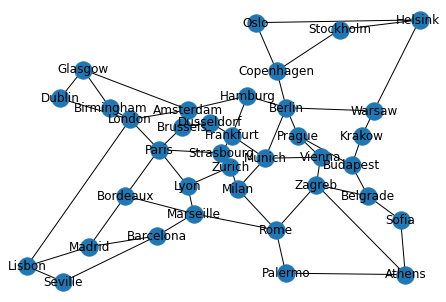

In [8]:
G5 = nx.Graph()

G5.add_nodes_from(["Amsterdam" ,"Athens" ,"Barcelona" ,"Belgrade","Berlin" ,"Birmingham" ,"Bordeaux" ,"Brussels" ,
                  "Budapest" ,"Copenhagen" ,"Dublin" ,"Dusseldorf" ,"Frankfurt" ,"Glasgow" ,"Hamburg" ,"Helsinki" ,
                  "Krakow" ,"Lisbon" ,"London" ,"Lyon" ,"Madrid" ,"Marseille" ,"Milan" ,"Munich" ,"Oslo","Palermo",
                  "Paris", "Prague" ,"Rome" ,"Seville" ,"Sofia","Stockholm" ,"Strasbourg" ,"Vienna","Warsaw" ,
                  "Zagreb" ,"Zurich"])

pos_G5 = {
  "Amsterdam" :( 4.90, 52.35 ),
  "Athens" :( 23.73, 38.00 ),
  "Barcelona" :( 2.18, 41.37 ),
  "Belgrade": ( 20.50, 44.83 ),
  "Berlin" :( 13.40 ,52.52 ),
  "Birmingham" :( -1.88, 52.47 ),
  "Bordeaux" :( -0.57 ,44.85 ),
  "Brussels" :( 4.35 ,50.83 ),
  "Budapest" :( 19.08, 47.50 ),
  "Copenhagen" :( 12.57, 55.72 ),
  "Dublin" :( -6.25 ,53.33 ),
  "Dusseldorf" :( 6.78, 51.23 ),
  "Frankfurt" :( 8.67 ,50.10 ),
  "Glasgow" :( -4.25 ,55.85 ),
  "Hamburg" :( 10.02 ,53.55 ),
  "Helsinki" :( 24.97, 60.17 ),
  "Krakow" :( 19.95 ,50.05 ),
  "Lisbon" :( -9.13 ,38.73 ),
  "London" :( -0.17 ,51.50 ),
  "Lyon" :( 4.83 ,45.73 ),
  "Madrid" :( -3.72, 40.42 ),
  "Marseille" :( 5.37, 43.30 ),
  "Milan" :( 9.17 ,45.47 ),
  "Munich" :( 11.57, 48.13 ),
  "Oslo" :( 10.75 ,59.93 ),
  "Palermo" :( 13.35, 38.12 ),
  "Paris" :( 2.33 ,48.87 ),
  "Prague" :( 14.43 ,50.08 ),
  "Rome" :( 12.50 ,41.88 ),
  "Seville" :( -5.98, 37.38 ),
  "Sofia" :( 23.33 ,42.75 ),
  "Stockholm" :( 18.05, 59.33 ),
  "Strasbourg" :( 7.77, 48.58 ),
  "Vienna" :( 16.37 ,48.22 ),
  "Warsaw" :( 21.00 ,52.25 ),
  "Zagreb" :( 16.02 ,45.83 ),
  "Zurich" :( 8.55 ,47.38 )
}

G5.add_edges_from([
   ( "Amsterdam", "Brussels",{"weight":2.59} ), 
   ( "Amsterdam", "Glasgow",{"weight":10.67} ) ,  
   ( "Amsterdam", "Hamburg",{"weight":5.52} ) ,  
   ( "Amsterdam", "London",{"weight":5.40} ),   
   ( "Athens", "Palermo",{"weight":13.63}  ),  
   ( "Athens", "Sofia",{"weight":7.94}  ),  
   ( "Athens", "Zagreb",{"weight":15.00}  ),  
   ( "Barcelona", "Madrid",{"weight":7.60} ), 
   ( "Barcelona", "Marseille",{"weight":5.08} ),  
   ( "Barcelona", "Seville",{"weight":12.44} ),   
   ( "Belgrade" ,"Budapest",{"weight":4.74} ),   
   ( "Belgrade", "Sofia",{"weight":4.87} ),   
   ( "Belgrade" ,"Zagreb",{"weight":5.51}  ), 
   ( "Berlin", "Copenhagen",{"weight":5.40} ),  
   ( "Berlin", "Hamburg",{"weight":3.81} ),   
   ( "Berlin", "Munich",{"weight":7.57 } ),  
   ( "Berlin", "Prague",{"weight":4.20}),   
   ( "Berlin", "Warsaw",{"weight":7.75} ),   
   ( "Birmingham", "Glasgow",{"weight":6.10} ),   
   ( "Birmingham", "London",{"weight":2.39} ),   
   ( "Bordeaux" ,"Madrid",{"weight":8.34} ),   
   ( "Bordeaux", "Marseille",{"weight":7.56} ),  
   ( "Bordeaux", "Paris",{"weight":7.47} ),  
   ( "Brussels", "Dusseldorf",{"weight":2.64} ),  
   ( "Brussels", "Paris",{"weight":3.93} ),   
   ( "Budapest", "Krakow",{"weight":4.36} ),   
   ( "Budapest", "Prague",{"weight":6.68} ) ,  
   ( "Copenhagen" ,"Oslo",{"weight":7.22} ) ,  
   ( "Copenhagen" ,"Stockholm",{"weight":7.77} ),   
   ( "Dublin", "Glasgow",{"weight":4.62} ),   
   ( "Dublin", "London",{"weight":6.90} ),   
   ( "Dusseldorf", "Frankfurt",{"weight":2.75} ),   
   ( "Frankfurt", "Hamburg",{"weight":5.92} ),   
   ( "Frankfurt" ,"Munich",{"weight":4.56} ),   
   ( "Frankfurt", "Strasbourg",{"weight":2.71} ),   
   ( "Helsinki","Oslo",{"weight":11.82} ),   
   ( "Helsinki", "Stockholm",{"weight":5.97} ),   
   ( "Helsinki", "Warsaw",{"weight":13.70} ),   
   ( "Krakow" ,"Warsaw",{"weight":3.83}),    
   ( "Lisbon", "London",{"weight":19.77} ),  
   ( "Lisbon", "Madrid",{"weight":7.51}),  
   ( "Lisbon", "Seville",{"weight":4.71}  ),  
   ( "London", "Paris",{"weight":5.14} ), 
   ( "Lyon", "Marseille",{"weight":4.11} ),  
   ( "Lyon", "Paris",{"weight":5.94} ), 
   ( "Lyon", "Zurich",{"weight":5.07} ),  
   ( "Marseille", "Rome",{"weight":9.07} ),  
   ( "Milan", "Munich",{"weight":5.22} ),  
   ( "Milan", "Rome",{"weight":7.20} ), 
   ( "Milan", "Zurich",{"weight":3.27} ),  
   ( "Munich", "Vienna",{"weight":5.34} ), 
   ( "Palermo" ,"Rome",{"weight":6.38} ),  
   ( "Paris", "Strasbourg",{"weight":6.00} ), 
   ( "Prague", "Vienna",{"weight":3.76} ),  
   ( "Rome", "Zagreb",{"weight":7.83}),  
   ( "Strasbourg" ,"Zurich",{"weight":2.18} ), 
   ( "Vienna", "Zagreb",{"weight":4.00} )  
])

nx.draw(G5, pos=pos_G5, with_labels=True)

In [9]:
def dist_euclidean_G1(p1, p2):
    x1, y1 = pos_G1[p1]
    x2, y2 = pos_G1[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G2(p1, p2):
    x1, y1 = pos_G2[p1]
    x2, y2 = pos_G2[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G3(p1, p2):
    x1, y1 = pos_G3[p1]
    x2, y2 = pos_G3[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G4(p1, p2):
    x1, y1 = pos_G4[p1]
    x2, y2 = pos_G4[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G5(p1, p2):
    x1, y1 = pos_G5[p1]
    x2, y2 = pos_G5[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

# Storing all pairs in our lists for the algorithms

In [10]:
for k in range(1,6):
    exec(f'DG_{k} = []')  #The variables will be DG_1, DG_2 etc..
    
for k in range(1,6):
    exec(f'HG1_{k} = []')    
    
for k in range(1,6):
    exec(f'HG2_{k} = []') 

for k in range(1,6):
    exec(f'HG3_{k} = []')
    
for k in range(1,19):
    exec(f'A_{k} = []') 

In [11]:
# for dijkstra we might need to specify some argument for it to take into account the weightings

for i in list(G1.nodes):
    for j in list(G1.nodes):
        DG_1.append(nx.dijkstra_path(G1, i, j, weight="weight"))
        
for i in list(G2.nodes):
    for j in list(G2.nodes):
        DG_2.append(nx.dijkstra_path(G2, i, j, weight="weight"))
        
for i in list(G3.nodes):
    for j in list(G3.nodes):
        DG_3.append(nx.dijkstra_path(G3, i, j, weight="weight"))
        
for i in list(G4.nodes):
    for j in list(G4.nodes):
        DG_4.append(nx.dijkstra_path(G4, i, j, weight="weight"))
        
for i in list(G5.nodes):
    for j in list(G5.nodes):
        DG_5.append(nx.dijkstra_path(G5, i, j, weight="weight"))

In [12]:
for i in list(G1.nodes):
    for j in list(G1.nodes):
        HG1_1.append(Human_gaze_algorithm_backtracking(G1, i, j, pos_G1))
        
for i in list(G2.nodes):
    for j in list(G2.nodes):
        HG1_2.append(Human_gaze_algorithm_backtracking(G2, i, j, pos_G2))
        
for i in list(G3.nodes):
    for j in list(G3.nodes):
        HG1_3.append(Human_gaze_algorithm_backtracking(G3, i, j, pos_G3))
        
for i in list(G4.nodes):
    for j in list(G4.nodes):
        HG1_4.append(Human_gaze_algorithm_backtracking(G4, i, j, pos_G4))
        
for i in list(G5.nodes):
    for j in list(G5.nodes):
        HG1_5.append(Human_gaze_algorithm_backtracking(G5, i, j, pos_G5))

In [13]:
for i in list(G1.nodes):
    for j in list(G1.nodes):
        HG2_1.append(Human_gaze_algorithm_2_backtracking(G1, i, j, pos_G1))
        
for i in list(G2.nodes):
    for j in list(G2.nodes):
        HG2_2.append(Human_gaze_algorithm_2_backtracking(G2, i, j, pos_G2))
        
for i in list(G3.nodes):
    for j in list(G3.nodes):
        HG2_3.append(Human_gaze_algorithm_2_backtracking(G3, i, j, pos_G3))
        
for i in list(G4.nodes):
    for j in list(G4.nodes):
        HG2_4.append(Human_gaze_algorithm_2_backtracking(G4, i, j, pos_G4))
        
for i in list(G5.nodes):
    for j in list(G5.nodes):
        HG2_5.append(Human_gaze_algorithm_2_backtracking(G5, i, j, pos_G5))

In [14]:
for i in list(G1.nodes):
    for j in list(G1.nodes):
        HG3_1.append(Human_gaze_algorithm_3_backtracking(G1, i, j, pos_G1))
        
for i in list(G2.nodes):
    for j in list(G2.nodes):
        HG3_2.append(Human_gaze_algorithm_3_backtracking(G2, i, j, pos_G2))
        
for i in list(G3.nodes):
    for j in list(G3.nodes):
        HG3_3.append(Human_gaze_algorithm_3_backtracking(G3, i, j, pos_G3))
        
for i in list(G4.nodes):
    for j in list(G4.nodes):
        HG3_4.append(Human_gaze_algorithm_3_backtracking(G4, i, j, pos_G4))
        
for i in list(G5.nodes):
    for j in list(G5.nodes):
        HG3_5.append(Human_gaze_algorithm_3_backtracking(G5, i, j, pos_G5))

In [15]:
for i in list(G1.nodes):
    for j in list(G1.nodes):
        A_1.append(nx.astar_path(G1, i, j, heuristic=dist_euclidean_G1))
        
for i in list(G2.nodes):
    for j in list(G2.nodes):
        A_2.append(nx.astar_path(G2, i, j, heuristic=dist_euclidean_G2))
        
for i in list(G3.nodes):
    for j in list(G3.nodes):
        A_3.append(nx.astar_path(G3, i, j, heuristic=dist_euclidean_G3))
        
for i in list(G4.nodes):
    for j in list(G4.nodes):
        A_4.append(nx.astar_path(G4, i, j, heuristic=dist_euclidean_G4))
        
for i in list(G5.nodes):
    for j in list(G5.nodes):
        A_5.append(nx.astar_path(G5, i, j, heuristic=dist_euclidean_G5))

In [16]:
HG1_list = [HG1_1, HG1_2, HG1_3, HG1_4, HG1_5]
HG2_list = [HG2_1, HG2_2, HG2_3, HG2_4, HG2_5]
HG3_list = [HG3_1, HG3_2, HG3_3, HG3_4, HG3_5]
A_list = [A_1, A_2, A_3, A_4, A_5]
#HG2G_list = [HG2G_1, HG2G_2, HG2G_3, HG2G_4, HG2G_5]
DG_list = [DG_1, DG_2, DG_3, DG_4, DG_5]
graphs = [G1, G2, G3, G4, G5]
graph_positions = [pos_G1, pos_G2, pos_G3, pos_G4, pos_G5]

# Error percentage with respect to Dijkstra

In [17]:
def compare_path(L1, L2): #inputs are the list of list(paths) for all node pairs for dijkstra and HG, same size lists
    different_path = []
    n = 0
    if L1 == L2:
        return "Equal"
    else:
        for i in range(len(L1)): #L1 and L2 should be the same length
            if len(L1[i]) < len(L2[i]):
                n += 1
                different_path.append([L1[i], L2[i]])
        #return [different_path, n, len(L1), n/len(L1)*100] 
        return different_path
    
def HG_error(L1, L2):
    n = 0
    if L1 == L2:
        return "Equal"
    else:
        for i in range(len(L1)): #L1 and L2 should be the same length
            if len(L1[i]) < len(L2[i]):
                n += 1
                
        return n/len(L1)*100

In [18]:
for i in range(5):
    print(HG_error(DG_list[i], HG1_list[i]))

65.2
53.24444444444445
41.48
35.66666666666667
36.084733382030684


In [19]:
for i in range(5):
    print(HG_error(DG_list[i], HG2_list[i]))

60.39
45.45777777777778
33.56
27.111111111111114
31.921110299488674


In [20]:
for i in range(5):
    print(HG_error(DG_list[i], HG3_list[i]))

41.89
33.58222222222223
15.24
17.22222222222222
17.092768444119795


In [21]:
for i in range(5):
    print(HG_error(DG_list[i], A_list[i]))

Equal
Equal
Equal
Equal
Equal


In [22]:
#for i in range(5):
    #print(HG_error(DG_list[i], HG2G_list[i]))

In [23]:
# As network connectivity increases the error with respect to Dijkstra decreases

### When there is an extra heuristic it might be better to take the geodesic from start to end always

### Look at the graphs which have lat and long inverted to see how it may affect the performance, e.g. of version3

### Find the overal weight of the paths to compare to dijkstra

# Comparing weights of paths

In [24]:
def path_weight_sum(path, Graph): #path is the list of nodes for one node pair, e.g. DG_list[0][1]
    sum_weight = 0
    for i in range(1,len(path)):
        sum_weight += Graph.edges[path[i-1], path[i]]['weight']
    return sum_weight #returns total weight of path for one node pair

def all_path_weight_sum_average(path, Graph): 
    k = 0
    for i in range(len(path)):
        k += path_weight_sum(path[i], Graph)
    average = (k/len(path))
    return average # returns average weight of all summed weight of each node pair

def all_path_weight_sum_compare(path1, path2, Graph):
    
    average1 = all_path_weight_sum_average(path1, Graph)
    average2 = all_path_weight_sum_average(path2, Graph)
    difference = abs(average1-average2)
    return difference # returns the difference of the average for two graphs with all node pairs

def average_edge_weight(Graph):
    sum_weight = 0
    for i in list(Graph.edges):
        sum_weight += Graph.edges[i]["weight"]
    average_weight = (sum_weight/len(list(Graph.edges)))
    return average_weight


def HG_error_weight(L1, L2, Graph):
    n = 0
    for i in range(len(L1)): #L1 and L2 should be the same length
        if path_weight_sum(L1[i], Graph) < path_weight_sum(L2[i], Graph):
            n += 1
        
    return n/len(L1)*100

In [25]:
print(HG_error_weight(DG_list[0], HG1_list[0], G1))
print(HG_error_weight(DG_list[1], HG1_list[1], G2))
print(HG_error_weight(DG_list[2], HG1_list[2], G3))
print(HG_error_weight(DG_list[3], HG1_list[3], G4))
print(HG_error_weight(DG_list[4], HG1_list[4], G5))

73.63
62.577777777777776
52.64
42.66666666666667
45.36157779401023


In [26]:
print(HG_error_weight(DG_list[0], HG2_list[0], G1))
print(HG_error_weight(DG_list[1], HG2_list[1], G2))
print(HG_error_weight(DG_list[2], HG2_list[2], G3))
print(HG_error_weight(DG_list[3], HG2_list[3], G4))
print(HG_error_weight(DG_list[4], HG2_list[4], G5))

68.52000000000001
55.85777777777777
42.44
32.88888888888889
38.495252008765526


In [27]:
print(HG_error_weight(DG_list[0], HG3_list[0], G1))
print(HG_error_weight(DG_list[1], HG3_list[1], G2))
print(HG_error_weight(DG_list[2], HG3_list[2], G3))
print(HG_error_weight(DG_list[3], HG3_list[3], G4))
print(HG_error_weight(DG_list[4], HG3_list[4], G5))

61.59
51.78666666666667
34.56
25.555555555555554
33.23593864134405


In [28]:
# G1
print("average edge weight for one hop for G1 is: " + str(average_edge_weight(G1)))
print()
# on average the total weight of a given path found by HG version is ... weight bigger than DG,
# then the average weight of a single path is given as reference to show by approximately how longer the path found
# by a HG version is compared to Dijkstra
print(all_path_weight_sum_compare(DG_list[0], HG1_list[0], G1))
print(all_path_weight_sum_compare(DG_list[0], HG2_list[0], G1))
print(all_path_weight_sum_compare(DG_list[0], HG3_list[0], G1))
#print(all_path_weight_sum_compare(DG_list[0], HG2G_list[0], G1))

# I am using as baseline the average weight of one hop, shouldn't I use the average weight of all paths together,
# my previous functions require the specific path found by an algorithm though

average edge weight for one hop for G1 is: 1251.236383098456

7116.93614256532
7109.775292197645
2084.0690140052184


In [29]:
# G2
print("average edge weight for G2 is: " + str(average_edge_weight(G2)))
print()

print(all_path_weight_sum_compare(DG_list[1], HG1_list[1], G2))
print(all_path_weight_sum_compare(DG_list[1], HG2_list[1], G2))
print(all_path_weight_sum_compare(DG_list[1], HG3_list[1], G2))
#print(all_path_weight_sum_compare(DG_list[1], HG2G_list[1], G2))

average edge weight for G2 is: 391.7804835574746

1338.6179564012323
858.6449284076398
303.87563686557996


In [30]:
#G3
print("average edge weight for G3 is: " + str(average_edge_weight(G3)))
print()

print(all_path_weight_sum_compare(DG_list[2], HG1_list[2], G3))
print(all_path_weight_sum_compare(DG_list[2], HG2_list[2], G3))
print(all_path_weight_sum_compare(DG_list[2], HG3_list[2], G3))
#print(all_path_weight_sum_compare(DG_list[2], HG2G_list[2], G3))

average edge weight for G3 is: 100.04340909090907

174.36752800000016
62.69144799999958
17.775644000000398


In [31]:
#G4
print("average edge weight for G4 is: " + str(average_edge_weight(G4)))
print()

print(all_path_weight_sum_compare(DG_list[3], HG1_list[3], G4))
print(all_path_weight_sum_compare(DG_list[3], HG2_list[3], G4))
print(all_path_weight_sum_compare(DG_list[3], HG3_list[3], G4))
#print(all_path_weight_sum_compare(DG_list[3], HG2G_list[3], G4))

average edge weight for G4 is: 696.2027777777778

729.6885555555596
548.0413333333363
287.4973333333346


In [32]:
#G5
print("average edge weight for G5 is: " + str(average_edge_weight(G5)))
print()

print(all_path_weight_sum_compare(DG_list[4], HG1_list[4], G5))
print(all_path_weight_sum_compare(DG_list[4], HG2_list[4], G5))
print(all_path_weight_sum_compare(DG_list[4], HG3_list[4], G5))
#print(all_path_weight_sum_compare(DG_list[4], HG2G_list[4], G5))

average edge weight for G5 is: 6.481754385964911

7.117742878013107
3.522768444119748
1.3658802045288638


In [33]:
print(all_path_weight_sum_average(DG_list[0], G1),G1)
print(all_path_weight_sum_average(DG_list[1], G2),G2)
print(all_path_weight_sum_average(DG_list[2], G3),G3)
print(all_path_weight_sum_average(DG_list[3], G4),G4)
print(all_path_weight_sum_average(DG_list[4], G5),G5)

7069.538188712105 
2531.6355600553625 
368.3345280000004 
2962.206666666665 
21.311117604090622 


In [34]:
print(all_path_weight_sum_average(HG1_list[0], G1),G1)
print(all_path_weight_sum_average(HG1_list[1], G2),G2)
print(all_path_weight_sum_average(HG1_list[2], G3),G3)
print(all_path_weight_sum_average(HG1_list[3], G4),G4)
print(all_path_weight_sum_average(HG1_list[4], G5),G5)

14186.474331277424 
3870.2535164565948 
542.7020560000005 
3691.8952222222247 
28.42886048210373 


In [35]:
print(all_path_weight_sum_average(HG2_list[0], G1),G1)
print(all_path_weight_sum_average(HG2_list[1], G2),G2)
print(all_path_weight_sum_average(HG2_list[2], G3),G3)
print(all_path_weight_sum_average(HG2_list[3], G4),G4)
print(all_path_weight_sum_average(HG2_list[4], G5),G5)

14179.31348090975 
3390.2804884630023 
431.02597599999996 
3510.2480000000014 
24.83388604821037 


In [36]:
print(all_path_weight_sum_average(HG3_list[0], G1),G1)
print(all_path_weight_sum_average(HG3_list[1], G2),G2)
print(all_path_weight_sum_average(HG3_list[2], G3),G3)
print(all_path_weight_sum_average(HG3_list[3], G4),G4)
print(all_path_weight_sum_average(HG3_list[4], G5),G5)

9153.607202717323 
2835.5111969209424 
386.1101720000008 
3249.7039999999997 
22.676997808619486 


# Measure of Network connectivity

In [39]:
#def network_connectivity(Graph):
    #edges = list(Graph.edges()) #does this take each line between nodes as two edges as we need it to? NO
    #nodes = list(Graph.nodes())
    #return len(edges)/(len(nodes)*(len(nodes)-1))

def network_connectivity(Graph):
    edges = list(Graph.edges())
    nodes = list(Graph.nodes())
    return (2*len(edges))/(len(nodes)*(len(nodes)-1))

    
    
for i in graphs:
    print(network_connectivity(i))
    
# These are all very low network connectivity in regards to when we measured hops on random graphs

0.027474747474747475
0.03567567567567568
0.07183673469387755
0.08275862068965517
0.08558558558558559


# Measure Runtime

In [40]:
def Runtime(path): # for individual paths
    start_time = time.time()
    path
    end_time = time.time()
    return end_time-start_time


def compare_runtime(Graph, Graph_set_DG, Graph_set_HG, algorithm, pos): #always compare HG versions to dijkstra since we don't specify the alg. in the arguments
   
    time_start_HG = time.perf_counter()
    for i in list(Graph.nodes):
        for j in list(Graph.nodes):
            Graph_set_HG.append(algorithm(Graph, i, j, pos))
    time_elapsed_HG = (time.perf_counter() - time_start_HG)
    memMb_HG=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
    
    time_start_DG = time.perf_counter()
    for i in list(Graph.nodes):
        for j in list(Graph.nodes):
            Graph_set_DG.append(nx.dijkstra_path(Graph, i, j))
    time_elapsed_DG = (time.perf_counter() - time_start_DG)
    memMb_DG=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0

    return print ("%5.1f secs %5.1f MByte" % (time_elapsed_DG,memMb_DG), "%5.1f secs %5.1f MByte" % (time_elapsed_HG,memMb_HG))


def compare_runtime_2(path1, path2): # comparind individual paths
    start_time_1 = time.time()
    path1
    end_time_1 = time.time()
    
    start_time_2 = time.time()
    path2
    end_time_2 = time.time()
    return (end_time_1-start_time_1,end_time_2-start_time_2)

In [41]:
# NOTE: the graphs are arranged in increasing order of network connectivity, for other measures this is usefull to
# show evolution of a parameter as network connectivity inrcreases, but run time depends on how big the network,
# and not as much the ratio of nodes to links
for i in range(5):
    print(compare_runtime(graphs[i], DG_list[i], HG1_list[i], Human_gaze_algorithm_backtracking, graph_positions[i]))

  1.6 secs 120.8 MByte   2.4 secs 119.3 MByte
None
  1.0 secs 122.2 MByte   0.8 secs 121.5 MByte
None
  0.3 secs 122.8 MByte   0.4 secs 122.6 MByte
None
  0.1 secs 123.0 MByte   0.1 secs 122.9 MByte
None
  0.2 secs 123.6 MByte   0.2 secs 123.5 MByte
None


In [42]:
for i in range(5):
    print(compare_runtime(graphs[i], DG_list[i], HG2_list[i], Human_gaze_algorithm_2_backtracking, graph_positions[i]))

  1.5 secs 127.6 MByte   2.7 secs 126.2 MByte
None
  0.6 secs 129.3 MByte   0.6 secs 128.6 MByte
None
  0.5 secs 129.9 MByte   0.2 secs 129.7 MByte
None
  0.1 secs 130.2 MByte   0.3 secs 130.1 MByte
None
  0.1 secs 130.5 MByte   0.1 secs 130.4 MByte
None


In [43]:
for i in range(5):
    print(compare_runtime(graphs[i], DG_list[i], HG3_list[i], Human_gaze_algorithm_3_backtracking, graph_positions[i]))

  1.6 secs 133.4 MByte   1.3 secs 132.3 MByte
None
  1.0 secs 135.0 MByte   0.6 secs 134.3 MByte
None
  0.5 secs 135.6 MByte   0.2 secs 135.3 MByte
None
  0.1 secs 135.8 MByte   0.1 secs 135.7 MByte
None
  0.2 secs 136.1 MByte   0.2 secs 136.0 MByte
None


In [44]:
#for i in range(5):
    #print(compare_runtime(graphs[i], DG_list[i], HG2G_list[i], Human_gaze_algorithm_2_backtracking_greedy, graph_positions[i]))

In [45]:
# Take some individual paths from the larger runtime graphs to compare as well using Runtime

#G1/HG1
print(compare_runtime_2(nx.dijkstra_path(G1, "Los_Angeles", "Bangkok"), Human_gaze_algorithm_backtracking(G1, "Los_Angeles", "Bangkok", pos_G1)))

(0.0, 0.0)


In [46]:
#G1/HG1
print(compare_runtime_2(nx.dijkstra_path(G1, "Los_Angeles", "Bangkok"), Human_gaze_algorithm_2_backtracking(G1, "Los_Angeles", "Bangkok", pos_G1)))

(0.0, 9.5367431640625e-07)


In [47]:
#G1/HG1
print(compare_runtime_2(nx.dijkstra_path(G1, "Los_Angeles", "Bangkok"), Human_gaze_algorithm_3_backtracking(G1, "Los_Angeles", "Bangkok", pos_G1)))

(0.0, 0.0)


In [48]:
print(compare_runtime_2(nx.dijkstra_path(G3, "Flensburg", "Kempten"), Human_gaze_algorithm_backtracking(G3, "Flensburg", "Kempten" ,pos_G3)))

(0.0, 9.5367431640625e-07)


In [49]:
print(compare_runtime_2(nx.dijkstra_path(G3, "Flensburg", "Kempten"), Human_gaze_algorithm_2_backtracking(G3, "Flensburg", "Kempten" ,pos_G3)))

(9.5367431640625e-07, 0.0)


In [50]:
print(compare_runtime_2(nx.dijkstra_path(G3, "Flensburg", "Kempten"), Human_gaze_algorithm_3_backtracking(G3, "Flensburg", "Kempten" ,pos_G3)))

(7.152557373046875e-07, 0.0)


In [51]:
print(compare_runtime_2(nx.dijkstra_path(G1, "Los_Angeles", "Bangkok"), nx.astar_path(G1, "Los_Angeles", "Bangkok", dist_euclidean_G1)))

(0.0, 0.0)


In [52]:
# Compare time with no backtracking
# Should I check average path length as well ?

# Average length of path
Might not be relevant here due to the weightings

In [53]:
def average_len(lst):
    lengths = [len(i) for i in lst]
    return 0 if len(lengths) == 0 else (float(sum(lengths)) / len(lengths))

In [54]:
for i in HG1_list:
    print(average_len(i))

18.3886
11.701333333333332
7.4008
6.7844444444444445
6.316289262235208


In [55]:
for i in HG2_list:
    print(average_len(i))

19.631
10.8208
6.414
6.7122222222222225
5.930606281957633


In [56]:
for i in HG3_list:
    print(average_len(i))

10.7449
8.644266666666667
5.5284
6.0377777777777775
5.12563915266618


In [57]:
for i in DG_list:
    print(average_len(i))

8.7928
7.8576
5.364
5.664444444444444
4.9123447772096425


# Plotting

In [58]:
import matplotlib.pyplot as plt

network_connectivity = [0.027474747474747475, 0.03567567567567568, 0.07183673469387755, 0.08275862068965517, 0.08558558558558559]
network_connectivity_2 = [0.027474747474747475+0.0009, 0.03567567567567568+0.0009, 0.07183673469387755+0.0009, 0.08275862068965517+0.0009, 0.08558558558558559+0.0009]
network_connectivity_3 = [0.027474747474747475+0.0018, 0.03567567567567568+0.0018, 0.07183673469387755+0.0018, 0.08275862068965517+0.0018, 0.08558558558558559+0.0018]
network_connectivity_4 = [0.027474747474747475+0.0027, 0.03567567567567568+0.0027, 0.07183673469387755+0.0027, 0.08275862068965517+0.0027, 0.08558558558558559+0.0027]

#network_connectivity = [0.013737373737373737,0.01783783783783784,0.035918367346938776,0.041379310344827586,0.04279279279279279]
#network_connectivity_2 = [0.013737373737373737+0.0009,0.01783783783783784+0.0009,0.035918367346938776+0.0009,0.041379310344827586+0.0009,0.04279279279279279+0.0009]
#network_connectivity_3 = [0.013737373737373737+0.0018,0.01783783783783784+0.0018,0.035918367346938776+0.0018,0.041379310344827586+0.0018,0.04279279279279279+0.0018]
#network_connectivity_4 = [0.013737373737373737+0.0027,0.01783783783783784+0.0027,0.035918367346938776+0.0027,0.041379310344827586+0.0027,0.04279279279279279+0.0027]

# This is without G5 as its weightings are different
#Network_connectivity = [0.013737373737373737,0.01783783783783784,0.035918367346938776,0.041379310344827586]
#Network_connectivity_2 = [0.013737373737373737+0.0009,0.01783783783783784+0.0009,0.035918367346938776+0.0009,0.041379310344827586+0.0009]
#Network_connectivity_3 = [0.013737373737373737+0.0018,0.01783783783783784+0.0018,0.035918367346938776+0.0018,0.041379310344827586+0.0018]
#Network_connectivity_4 = [0.013737373737373737+0.0027,0.01783783783783784+0.0027,0.035918367346938776+0.0027,0.041379310344827586+0.0027]

Network_connectivity = [0.027474747474747475, 0.03567567567567568, 0.07183673469387755, 0.08275862068965517]
Network_connectivity_2 = [0.027474747474747475+0.0009, 0.03567567567567568+0.0009, 0.07183673469387755+0.0009, 0.08275862068965517+0.0009]
Network_connectivity_3 = [0.027474747474747475+0.0018, 0.03567567567567568+0.0018, 0.07183673469387755+0.0018, 0.08275862068965517+0.0018]
Network_connectivity_4 = [0.027474747474747475+0.0027, 0.03567567567567568+0.0027, 0.07183673469387755+0.0027, 0.08275862068965517+0.0027]

path_error_HG1 = [65.2,53.24444444444445,41.48,35.66666666666667,36.084733382030684]
path_error_HG2 = [60.39,45.45777777777778,33.56,27.111111111111114,31.921110299488674]
path_error_HG3 = [41.89,33.58222222222223,15.24,17.22222222222222,17.092768444119795]

# This is without G5 as its weightings are different
Path_error_HG1 = [65.2,53.24444444444445,41.48,35.66666666666667]
Path_error_HG2 = [60.39,45.45777777777778,33.56,27.111111111111114]
Path_error_HG3 = [41.89,33.58222222222223,15.24,17.22222222222222]


weight_error_HG1 = [73.63,62.577777777777776,52.64,42.66666666666667,45.36157779401023]
weight_error_HG2 = [68.52000000000001,55.85777777777777,42.44,32.88888888888889,38.495252008765526]
weight_error_HG3 = [61.59,51.78666666666667,34.56,25.555555555555554,33.23593864134405]


average_len_HG1 = [18.3886,11.701333333333332,7.4008,6.7844444444444445,6.316289262235208]
average_len_HG2 = [19.631,10.8208,6.414,6.7122222222222225,5.930606281957633]
average_len_HG3 = [10.7449,8.644266666666667,5.5284,6.0377777777777775,5.12563915266618]
average_len_DG = [8.7928,7.8576,5.364,5.664444444444444,4.9123447772096425]

# This is without G5 as its weightings are different
Average_len_HG1 = [18.3886,11.701333333333332,7.4008,6.7844444444444445,6.316289262235208]
Average_len_HG2 = [19.631,10.8208,6.414,6.7122222222222225,5.930606281957633]
Average_len_HG3 = [10.7449,8.644266666666667,5.5284,6.0377777777777775,5.12563915266618]
Average_len_DG = [8.7928,7.8576,5.364,5.664444444444444,4.9123447772096425]


# all path sum weight is important to compare with network connectivity as it depends on the weights
# which can be anything

weight_paths_HG1 = [14186.474331277424 ,3870.2535164565948 ,542.7020560000005 ,3691.8952222222247 ,28.42886048210373 ]
weight_paths_HG2 = [14179.31348090975 ,3390.2804884630023 ,431.02597599999996 ,3510.2480000000014 ,24.83388604821037 ]
weight_paths_HG3 = [9153.607202717323 ,2835.5111969209424 ,386.1101720000008 ,3249.7039999999997 ,22.67699780861948]
weight_paths_DG = [7069.538188712105 ,2531.6355600553625 ,368.3345280000004 ,2962.206666666665 ,21.311117604090622 ]

# This is without G5 as its weightings are different
Weight_paths_HG1 = [14186.474331277424 ,3870.2535164565948 ,542.7020560000005 ,3691.8952222222247]
Weight_paths_HG2 = [14179.31348090975 ,3390.2804884630023 ,431.02597599999996 ,3510.2480000000014]
Weight_paths_HG3 = [9153.607202717323 ,2835.5111969209424 ,386.1101720000008 ,3249.7039999999997]
Weight_paths_DG = [7069.538188712105 ,2531.6355600553625 ,368.3345280000004 ,2962.206666666665]


# try dividing by average weight of a single hop to have better size comparison

# Do other way, for each graph e.g. network connectivity (take x ticks as graphs), print Hg path weight alongside DG

# here i divide the number by tha average hop weight so they are closer in range
weight_paths_HG1_flattend = [14186.474331277424/1251.23 ,3870.2535164565948/391.78 ,542.7020560000005/100.04 ,3691.8952222222247/696.20 ,28.42886048210373/6.48 ]
weight_paths_HG2_flattend = [14179.31348090975/1251.23 ,3390.2804884630023/391.78 ,431.02597599999996/100.04 ,3510.2480000000014/696.20 ,24.83388604821037/6.48 ]
weight_paths_HG3_flattend = [9153.607202717323/1251.23 ,2835.5111969209424/391.78 ,386.1101720000008/100.04 ,3249.7039999999997/696.20 ,22.67699780861948/6.48]
weight_paths_DG_flattend = [7069.538188712105/1251.23 ,2531.6355600553625/391.78 ,368.3345280000004/100.04 ,2962.206666666665/696.20 ,21.311117604090622/6.48 ]

## Path weight graphs

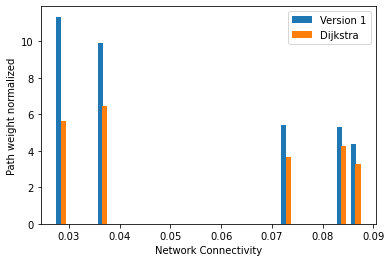

In [59]:
plt.bar(network_connectivity, weight_paths_HG1_flattend, width=0.001,align='edge', label="Version 1")
plt.bar(network_connectivity_2, weight_paths_DG_flattend, width=0.001,align='edge', label="Dijkstra")
plt.xlabel("Network Connectivity")
plt.ylabel("Path weight normalized")
plt.legend()

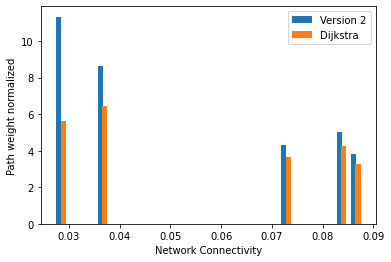

In [60]:
plt.bar(network_connectivity, weight_paths_HG2_flattend, width=0.001,align='edge', label="Version 2")
plt.bar(network_connectivity_2, weight_paths_DG_flattend, width=0.001,align='edge', label="Dijkstra")
plt.xlabel("Network Connectivity")
plt.ylabel("Path weight normalized")
plt.legend()

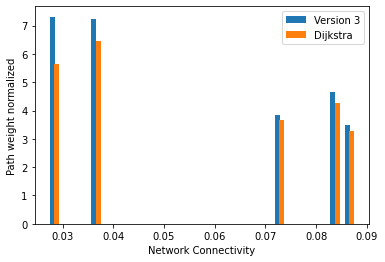

In [61]:
plt.bar(network_connectivity, weight_paths_HG3_flattend, width=0.001,align='edge', label="Version 3")
plt.bar(network_connectivity_2, weight_paths_DG_flattend, width=0.001,align='edge',label="Dijkstra")
plt.xlabel("Network Connectivity")
plt.ylabel("Path weight normalized")
plt.legend()

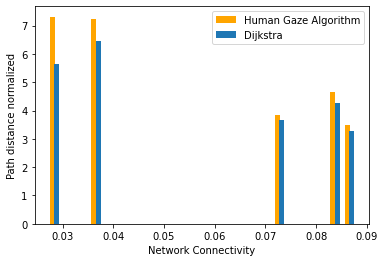

In [62]:
# Flattend without log

#plt.bar(network_connectivity, weight_paths_HG1_flattend, width=0.001, align='edge', label="Version 1")
#plt.bar(network_connectivity_2, weight_paths_HG2_flattend, width=0.001, align='edge', label="Version 2")
plt.bar(network_connectivity, weight_paths_HG3_flattend, width=0.001, align='edge', label="Human Gaze Algorithm", color="Orange")
plt.bar(network_connectivity_2, weight_paths_DG_flattend, width=0.001, align='edge', label="Dijkstra")
plt.xlabel("Network Connectivity")
plt.ylabel("Path distance normalized")
plt.legend()
plt.show()
#tick_label=["G1", "G2", "G3", "G4", "G5"]

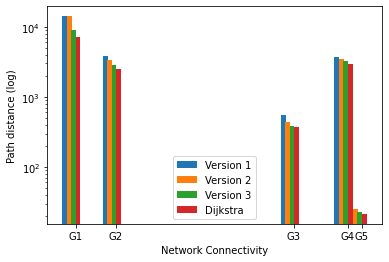

In [63]:
# unflattend with log

plt.bar(network_connectivity, weight_paths_HG1, width=0.001, align='edge', label="Version 1", log=True)
plt.bar(network_connectivity_2, weight_paths_HG2, width=0.001, align='edge', label="Version 2", log=True)
plt.bar(network_connectivity_3, weight_paths_HG3, width=0.001, align='edge', label="Version 3", log=True)
plt.bar(network_connectivity_4, weight_paths_DG, width=0.001, align='edge', tick_label=["G1", "G2", "G3", "G4", "G5"], label="Dijkstra", log=True)
plt.xlabel("Network Connectivity")
plt.ylabel("Path distance (log)")
plt.legend()
plt.show()

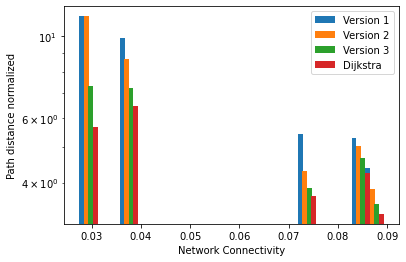

In [64]:
plt.bar(network_connectivity, weight_paths_HG1_flattend, width=0.001, align='edge', label="Version 1", log=True)
plt.bar(network_connectivity_2, weight_paths_HG2_flattend, width=0.001, align='edge', label="Version 2", log=True)
plt.bar(network_connectivity_3, weight_paths_HG3_flattend, width=0.001, align='edge', label="Version 3", log=True)
plt.bar(network_connectivity_4, weight_paths_DG_flattend, width=0.001, align='edge', label="Dijkstra", log=True)
plt.xlabel("Network Connectivity")
plt.ylabel("Path distance normalized")
plt.legend()
plt.show()

## Path error

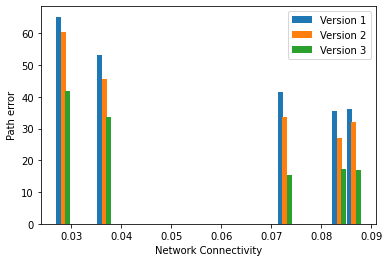

In [65]:
plt.bar(network_connectivity, path_error_HG1, width=0.001,align='center', label="Version 1")
plt.bar(network_connectivity_2, path_error_HG2, width=0.001,align='center', label="Version 2")
plt.bar(network_connectivity_3, path_error_HG3, width=0.001,align='center', label="Version 3")
plt.xlabel("Network Connectivity")
plt.ylabel("Path error")
plt.legend()
plt.show()

## Path length

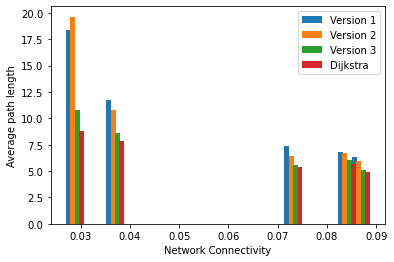

In [66]:
plt.bar(network_connectivity, average_len_HG1, width=0.001,align='center', label="Version 1")
plt.bar(network_connectivity_2, average_len_HG2, width=0.001,align='center', label="Version 2")
plt.bar(network_connectivity_3, average_len_HG3, width=0.001,align='center', label="Version 3")
plt.bar(network_connectivity_4, average_len_DG, width=0.001,align='center', label="Dijkstra")
plt.xlabel("Network Connectivity")
plt.ylabel("Average path length")
plt.legend()
plt.show()

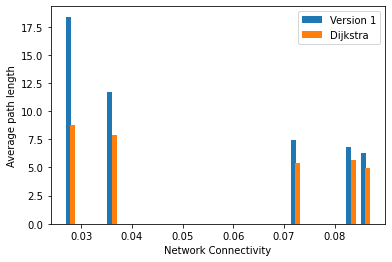

In [67]:
plt.bar(network_connectivity, average_len_HG1, width=0.001,align='center', label="Version 1")
plt.bar(network_connectivity_2, average_len_DG, width=0.001,align='center', label="Dijkstra")
plt.xlabel("Network Connectivity")
plt.ylabel("Average path length")
plt.legend()
plt.show()

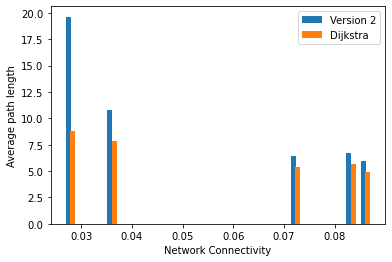

In [68]:
plt.bar(network_connectivity, average_len_HG2, width=0.001,align='center', label="Version 2")
plt.bar(network_connectivity_2, average_len_DG, width=0.001,align='center', label="Dijkstra")
plt.xlabel("Network Connectivity")
plt.ylabel("Average path length")
plt.legend()
plt.show()

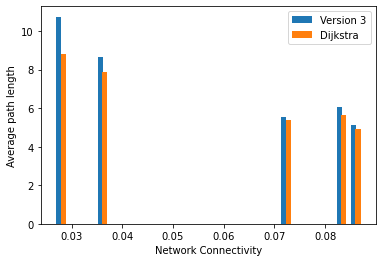

In [69]:
plt.bar(network_connectivity, average_len_HG3, width=0.001,align='center', label="Version 3")
plt.bar(network_connectivity_2, average_len_DG, width=0.001,align='center', label="Dijkstra")
plt.xlabel("Network Connectivity")
plt.ylabel("Average path length")
plt.legend()
plt.show()

In [70]:
# Try version three without the geodesic to see if it is good without it

In [71]:
# maybe path error should be using weightings here to determine the percenatge of paths that are longer than dijkstra
# path weight already covers this in a different way by comparing directly to dijkstra 
# instead of using dijkstra as a baseline

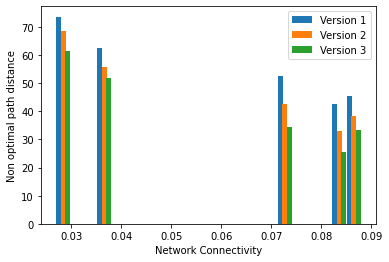

In [72]:
plt.bar(network_connectivity, weight_error_HG1, width=0.001,align='center', label="Version 1")
plt.bar(network_connectivity_2, weight_error_HG2, width=0.001,align='center', label="Version 2")
plt.bar(network_connectivity_3, weight_error_HG3, width=0.001,align='center', label="Version 3")
plt.xlabel("Network Connectivity")
plt.ylabel("Non optimal path distance")
plt.legend()
plt.show()